In [23]:
import classes
import functies
import sympy as sp

In [24]:
###bereken de fouten op de verdunningsreeksen
Cstock, Vstock, Vadd, Cnew = sp.symbols('Cstock Vstock Vadd Cnew')
Cnewvgl = classes.vergelijking(Cstock*Vstock/(Vadd+Vstock), [Cstock, Vstock, Vadd])

cstock = functies.vector_to_datapunt([60e-6, 0.5e-6, 'N'], Cstock) #M
#verdunning 1
vs1 = [3e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va1 = [57e-3, 0.05e-3, 'U'] #l, gemeten met buret
#verdunning 2
vs2 = [10e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va2 = [90e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf
#verdunning 3
vs3 = [6e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va3 = [34e-3, 0.05e-3, 'U'] #l, gemeten met buret
#verdunning 4
vs4 = [20e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va4 = [80e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf

stockvolumes_matrix = [vs1, vs2, vs3, vs4]
toegevoegde_volumes_matrix = [va1, va2, va3, va4]

stockvolumes_datapunten = functies.matrix_to_datapunten(stockvolumes_matrix, Vstock)
toegevoegde_volumes_datapunten = functies.matrix_to_datapunten(toegevoegde_volumes_matrix, Vadd)
parameters = [Cstock, Vstock, Vadd]
metingen = [[cstock, stockvolumes_datapunten[i],toegevoegde_volumes_datapunten[i]] for i in range(len(stockvolumes_datapunten))]

cnew = functies.multiple_analysis(Cnewvgl,metingen,Cnew)

print(cnew)
for indx in range(len(cnew)):
    data = cnew[indx]
    functies.latex_print_meting(stockvolumes_matrix[indx],'volume stockoplossing')
    functies.latex_print_meting(toegevoegde_volumes_matrix[indx],'toegevoegde volumes')
    functies.latex_print_meting(data)
    print('\n')

[datapunt[3.00000000000000e-6, 3.16696544643116e-12, 'Normaal'] of variable Cnew
 datapunt[6.00000000000000e-6, 2.14030371676545e-13, 'Normaal'] of variable Cnew
 datapunt[9.00000000000000e-6, 4.25429929600634e-12, 'Normaal'] of variable Cnew
 datapunt[1.20000000000000e-5, 4.08161732650184e-13, 'Normaal'] of variable Cnew]
$volume stockoplossing = (30.0 \pm 1.0)\cdot 10^{-4}$
$toegevoegde volumes = (5700.0 \pm 5.0)\cdot 10^{-5}$
$Cnew = (3000000.00000000 \pm 3.2)\cdot 10^{-12}$


$volume stockoplossing = (1000.0 \pm 2.0)\cdot 10^{-5}$
$toegevoegde volumes = (900.0 \pm 1.0)\cdot 10^{-4}$
$Cnew = (60000000.0000000 \pm 2.1)\cdot 10^{-13}$


$volume stockoplossing = (60.0 \pm 1.0)\cdot 10^{-4}$
$toegevoegde volumes = (3400.0 \pm 5.0)\cdot 10^{-5}$
$Cnew = (9000000.00000000 \pm 4.3)\cdot 10^{-12}$


$volume stockoplossing = (2000.0 \pm 2.0)\cdot 10^{-5}$
$toegevoegde volumes = (800.0 \pm 1.0)\cdot 10^{-4}$
$Cnew = (120000000.000000 \pm 4.1)\cdot 10^{-13}$




Help on function fit_2D in module functies:

fit_2D(parameters, model, initial_vals, x_val, y_val, x_variance, y_variance, grootteorde=1, x_as_titel='X-as', y_as_titel='Y-as', titel='Fit', figure_name=None, size=None, error_method='Old', savefig=False, detailed_logs=False)
    grootteorde geeft een schatting van de grootteorde van de parameters

[0.268 0.557 0.803 1.022]
[3.0e-06 6.0e-06 9.0e-06 1.2e-05]
[1.00296701e-23 4.58090000e-26 1.80990625e-23 1.66596000e-25]
[0.00044667 0.00092833 0.00133833 0.00170333]
#########################################
[88333.33333333334]
[8.83333333e+04 3.00000000e-06 6.00000000e-06 9.00000000e-06
 1.20000000e-05]
Ditctionary van minimize:
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.7009977134539134
        x: [ 8.833e+04  3.000e-06  6.000e-06  9.000e-06  1.200e-05]
      nit: 0
      jac: [ 3.846e-05  1.486e+15  3.253e+17  8.233e+14  8.944e+16]
 hess_inv: [[1 0 ... 0 0]
          

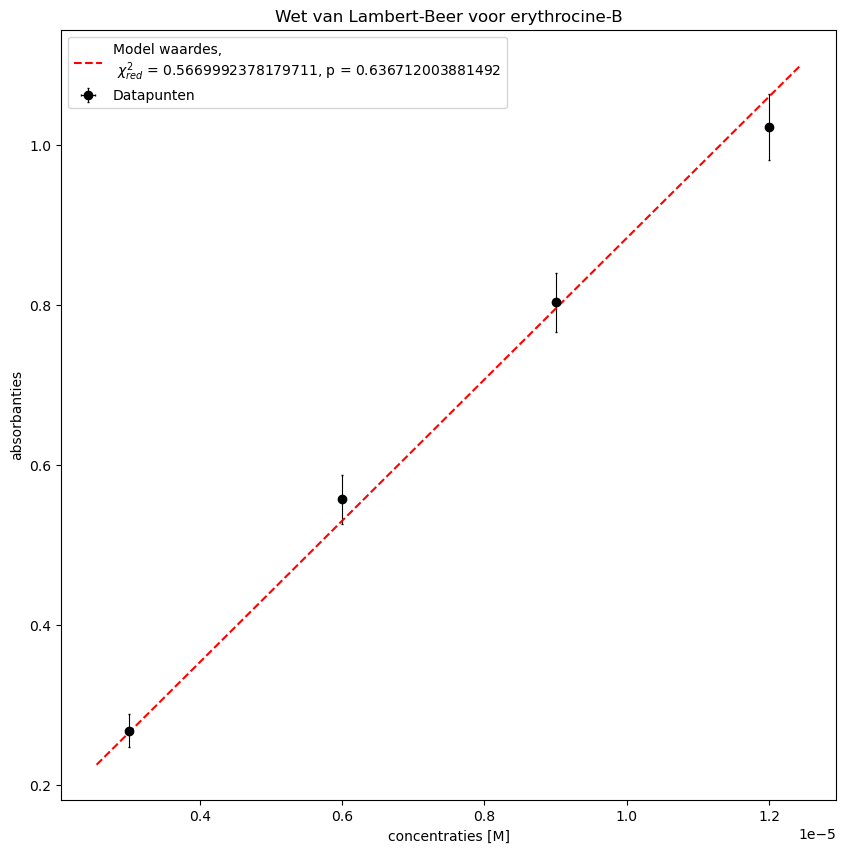

In [25]:
def lineair(c, param):
    epsiloneff = param[0]
    return epsiloneff*c
def initial_vals(x,y):
    return [1.06e5/1.2]
concentraties = np.array([cnew[i].get_val() for i in range(len(cnew))],dtype = float)
x_variantie = np.array([cnew[i].get_variance() for i in range(len(cnew))],dtype = float)
absorbanties = np.array([0.268, 0.557, 0.803, 1.022],dtype = float) #dimensieloos
parameter = ['epsilon_effectief']
y_fouten = 0.02*absorbanties
y_variantie = y_fouten/12

help(functies.fit_2D)
print(absorbanties)
print(concentraties)
print(x_variantie)
print(y_variantie)
print('#########################################')
outp = functies.fit_2D(parameter, lineair, initial_vals, concentraties, absorbanties, x_variance=x_variantie, y_variance = y_variantie, x_as_titel = 'concentraties [M]', y_as_titel = 'absorbanties',
                titel = 'Wet van Lambert-Beer voor erythrocine-B',savefig = True, detailed_logs=True)

In [22]:
latex_print_meting(outp[0],'\\epsilon\\cdot l')
print(outp)

$\epsilon\cdot l = (88.3 \pm 2.3)\cdot 10^{3}$
[[88333.33333333334, 2298.233729212152, 'S']]


In [27]:
#fit het boeltje
parameter = ['epsilon_effectief']
epsilon_fitwaarde = functies.fit(parameter, lineair, initial_vals, concentraties, absorbanties, y_err = y_fouten)[0]

A, epsilon_eff = sp.symbols('A epsilon_eff')
concentratie_voorschrift = classes.vergelijking(A/epsilon_eff, [A, epsilon_eff])
absorbantie_onbekend = [1.690, 0.02*1.690, 'U']
absorbantie_onbekend = functies.vector_to_datapunt(absorbantie_onbekend, A)
epsilon_fitwaarde = functies.vector_to_datapunt(outp[0], epsilon_eff)

concentratie_onbekend = functies.data_analyse(concentratie_voorschrift, [absorbantie_onbekend, epsilon_fitwaarde], sp.Symbol('C_onbekend'))
print(concentratie_onbekend)


Raw output
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.376751713983147
        x: [ 8.897e+04]
      nit: 3
      jac: [ 3.576e-07]
 hess_inv: [[ 3.962e+05]]
     nfev: 24
     njev: 12
[[88087.05582700793, 89857.4694216154]]
epsilon_effectief heeft als waarde: 88972 + 885.27 - 885.14 met 68% betrouwbaarheidsinterval: [88087, 89857] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.024679
De gereduceerde chi^2 waarde is: 3.1256
Andere verdelingen nog niet geïmplementeerd, fout als wortel van variantie genomen
datapunt[1.91320754716981e-5, 0.00114399955214603, 'Normaal'] of variable C_onbekend


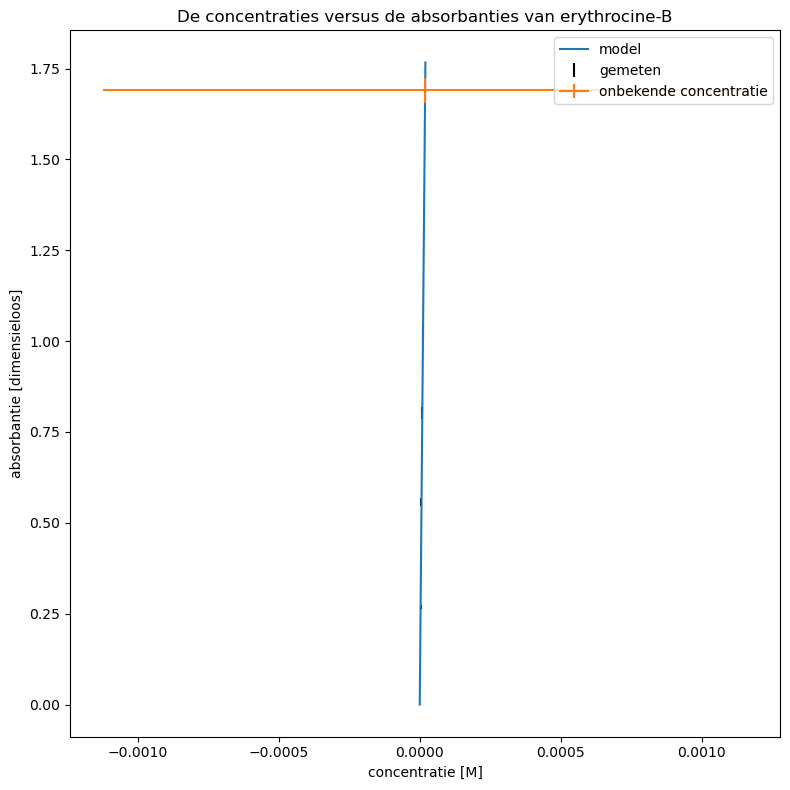

In [30]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

#de gekende punten en de fit
ax.errorbar(concentraties, absorbanties, yerr = y_fouten, linestyle = ' ', color = 'black', label = 'gemeten')
concentratie_linspace = np.linspace(0,20e-6)
ax.plot(concentratie_linspace, lineair(concentratie_linspace, [epsilon_fitwaarde.get_val()]), label = 'model')

#het onbekende punt
ax.errorbar(concentratie_onbekend.get_val(),absorbantie_onbekend.get_val(), yerr = absorbantie_onbekend.get_fout(), xerr = concentratie_onbekend.get_fout(), label = 'onbekende concentratie')


ax.set_xlabel('concentratie [M]')
ax.set_ylabel('absorbantie [dimensieloos]')
ax.set_title('De concentraties versus de absorbanties van erythrocine-B')
ax.legend()
plt.tight_layout();plt.show()